<a href="https://colab.research.google.com/github/UrmishaPal/ML-models/blob/main/Linear_Reggression_of_Kidney_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear reggression of kidney disease**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mansoordaku/ckdisease")

print("Path to dataset files:", path)

100%|██████████| 9.51k/9.51k [00:00<00:00, 13.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mansoordaku/ckdisease/versions/1


In [11]:
import os
df=pd.read_csv(os.path.join(path, 'kidney_disease.csv'))
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [13]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


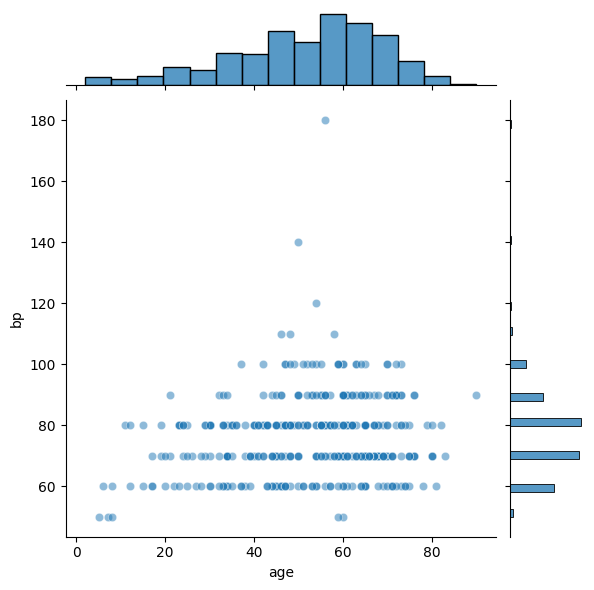

In [16]:
#EDA

sns.jointplot(x='age', y='bp', data=df, alpha=0.5)

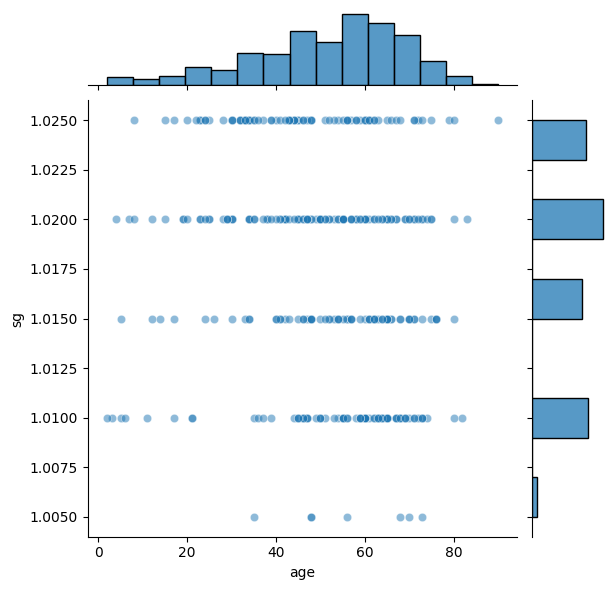

In [17]:
sns.jointplot(x='age', y='sg', data=df, alpha=0.5)

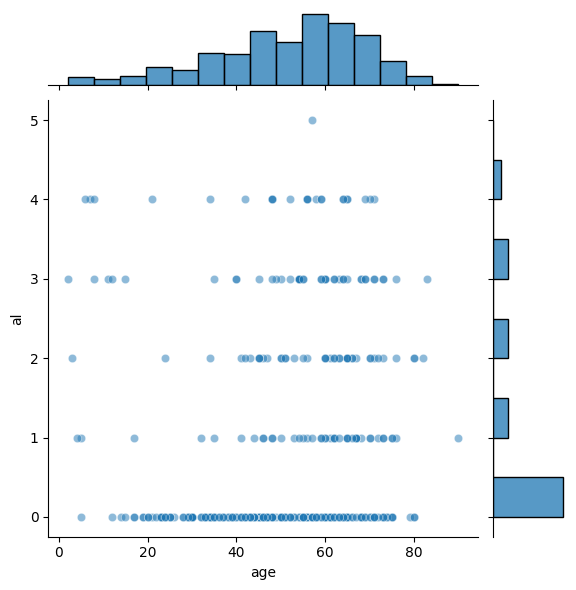

In [18]:
sns.jointplot(x='age', y='al', data=df, alpha=0.5)

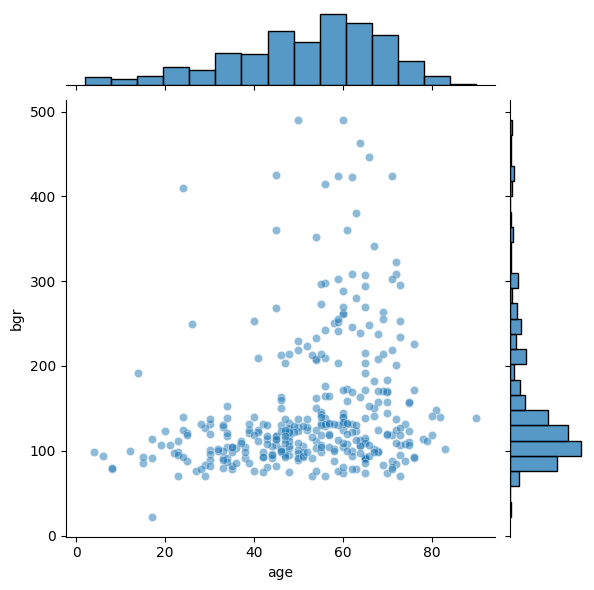

In [19]:
sns.jointplot(x='age', y='bgr', data=df, alpha=0.5)

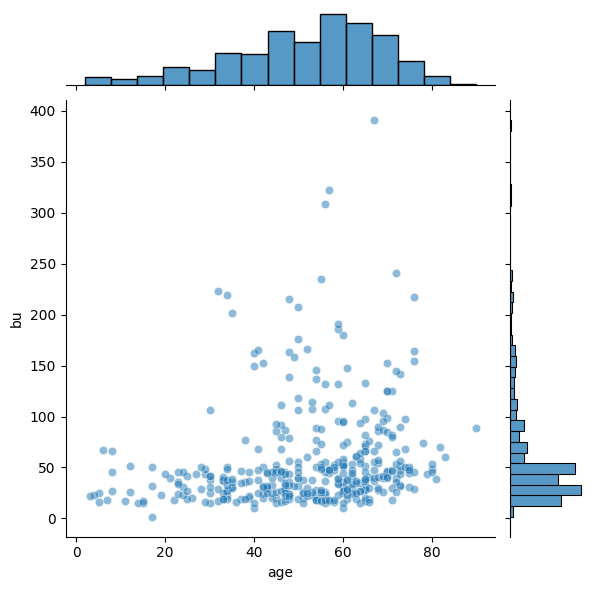

In [20]:
sns.jointplot(x='age', y='bu', data=df, alpha=0.5)

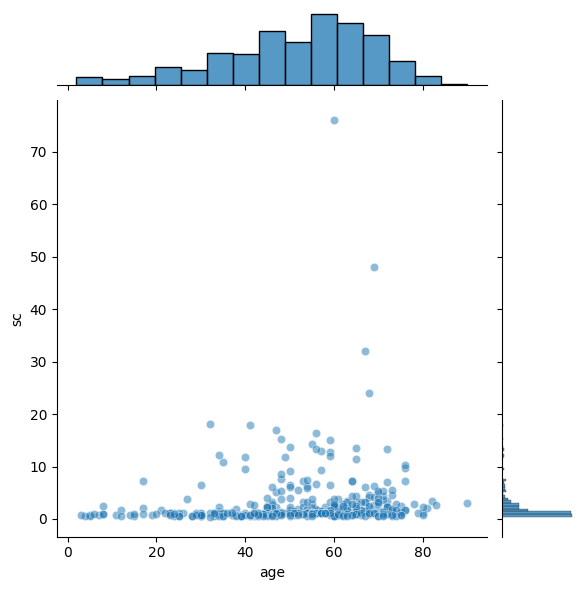

In [21]:
sns.jointplot(x='age', y='sc', data=df, alpha=0.5)

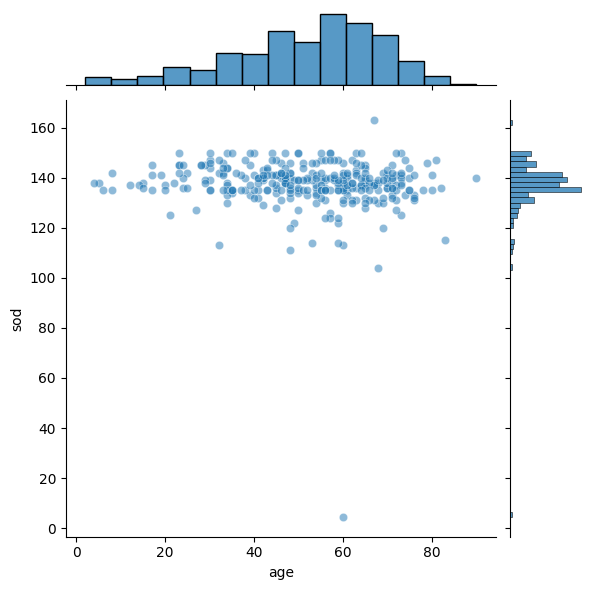

In [22]:
sns.jointplot(x='age', y='sod', data=df, alpha=0.5)

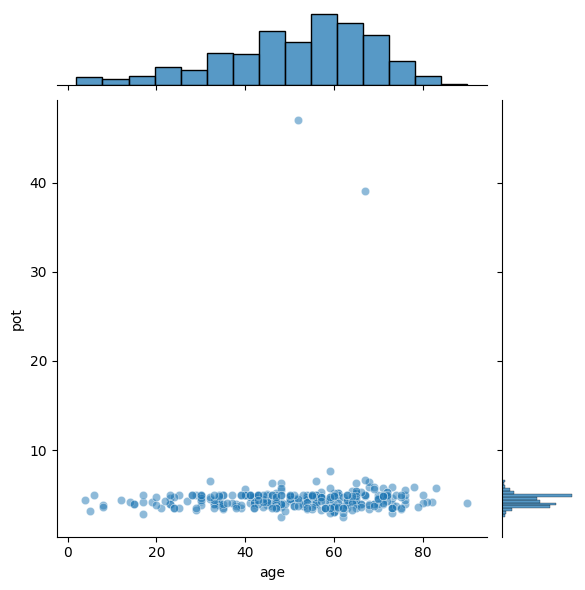

In [23]:
sns.jointplot(x='age', y='pot', data=df, alpha=0.5)

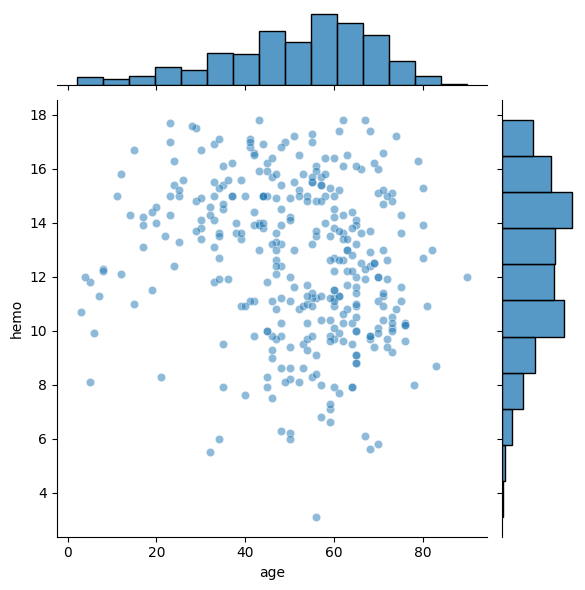

In [24]:
sns.jointplot(x='age', y='hemo', data=df, alpha=0.5)

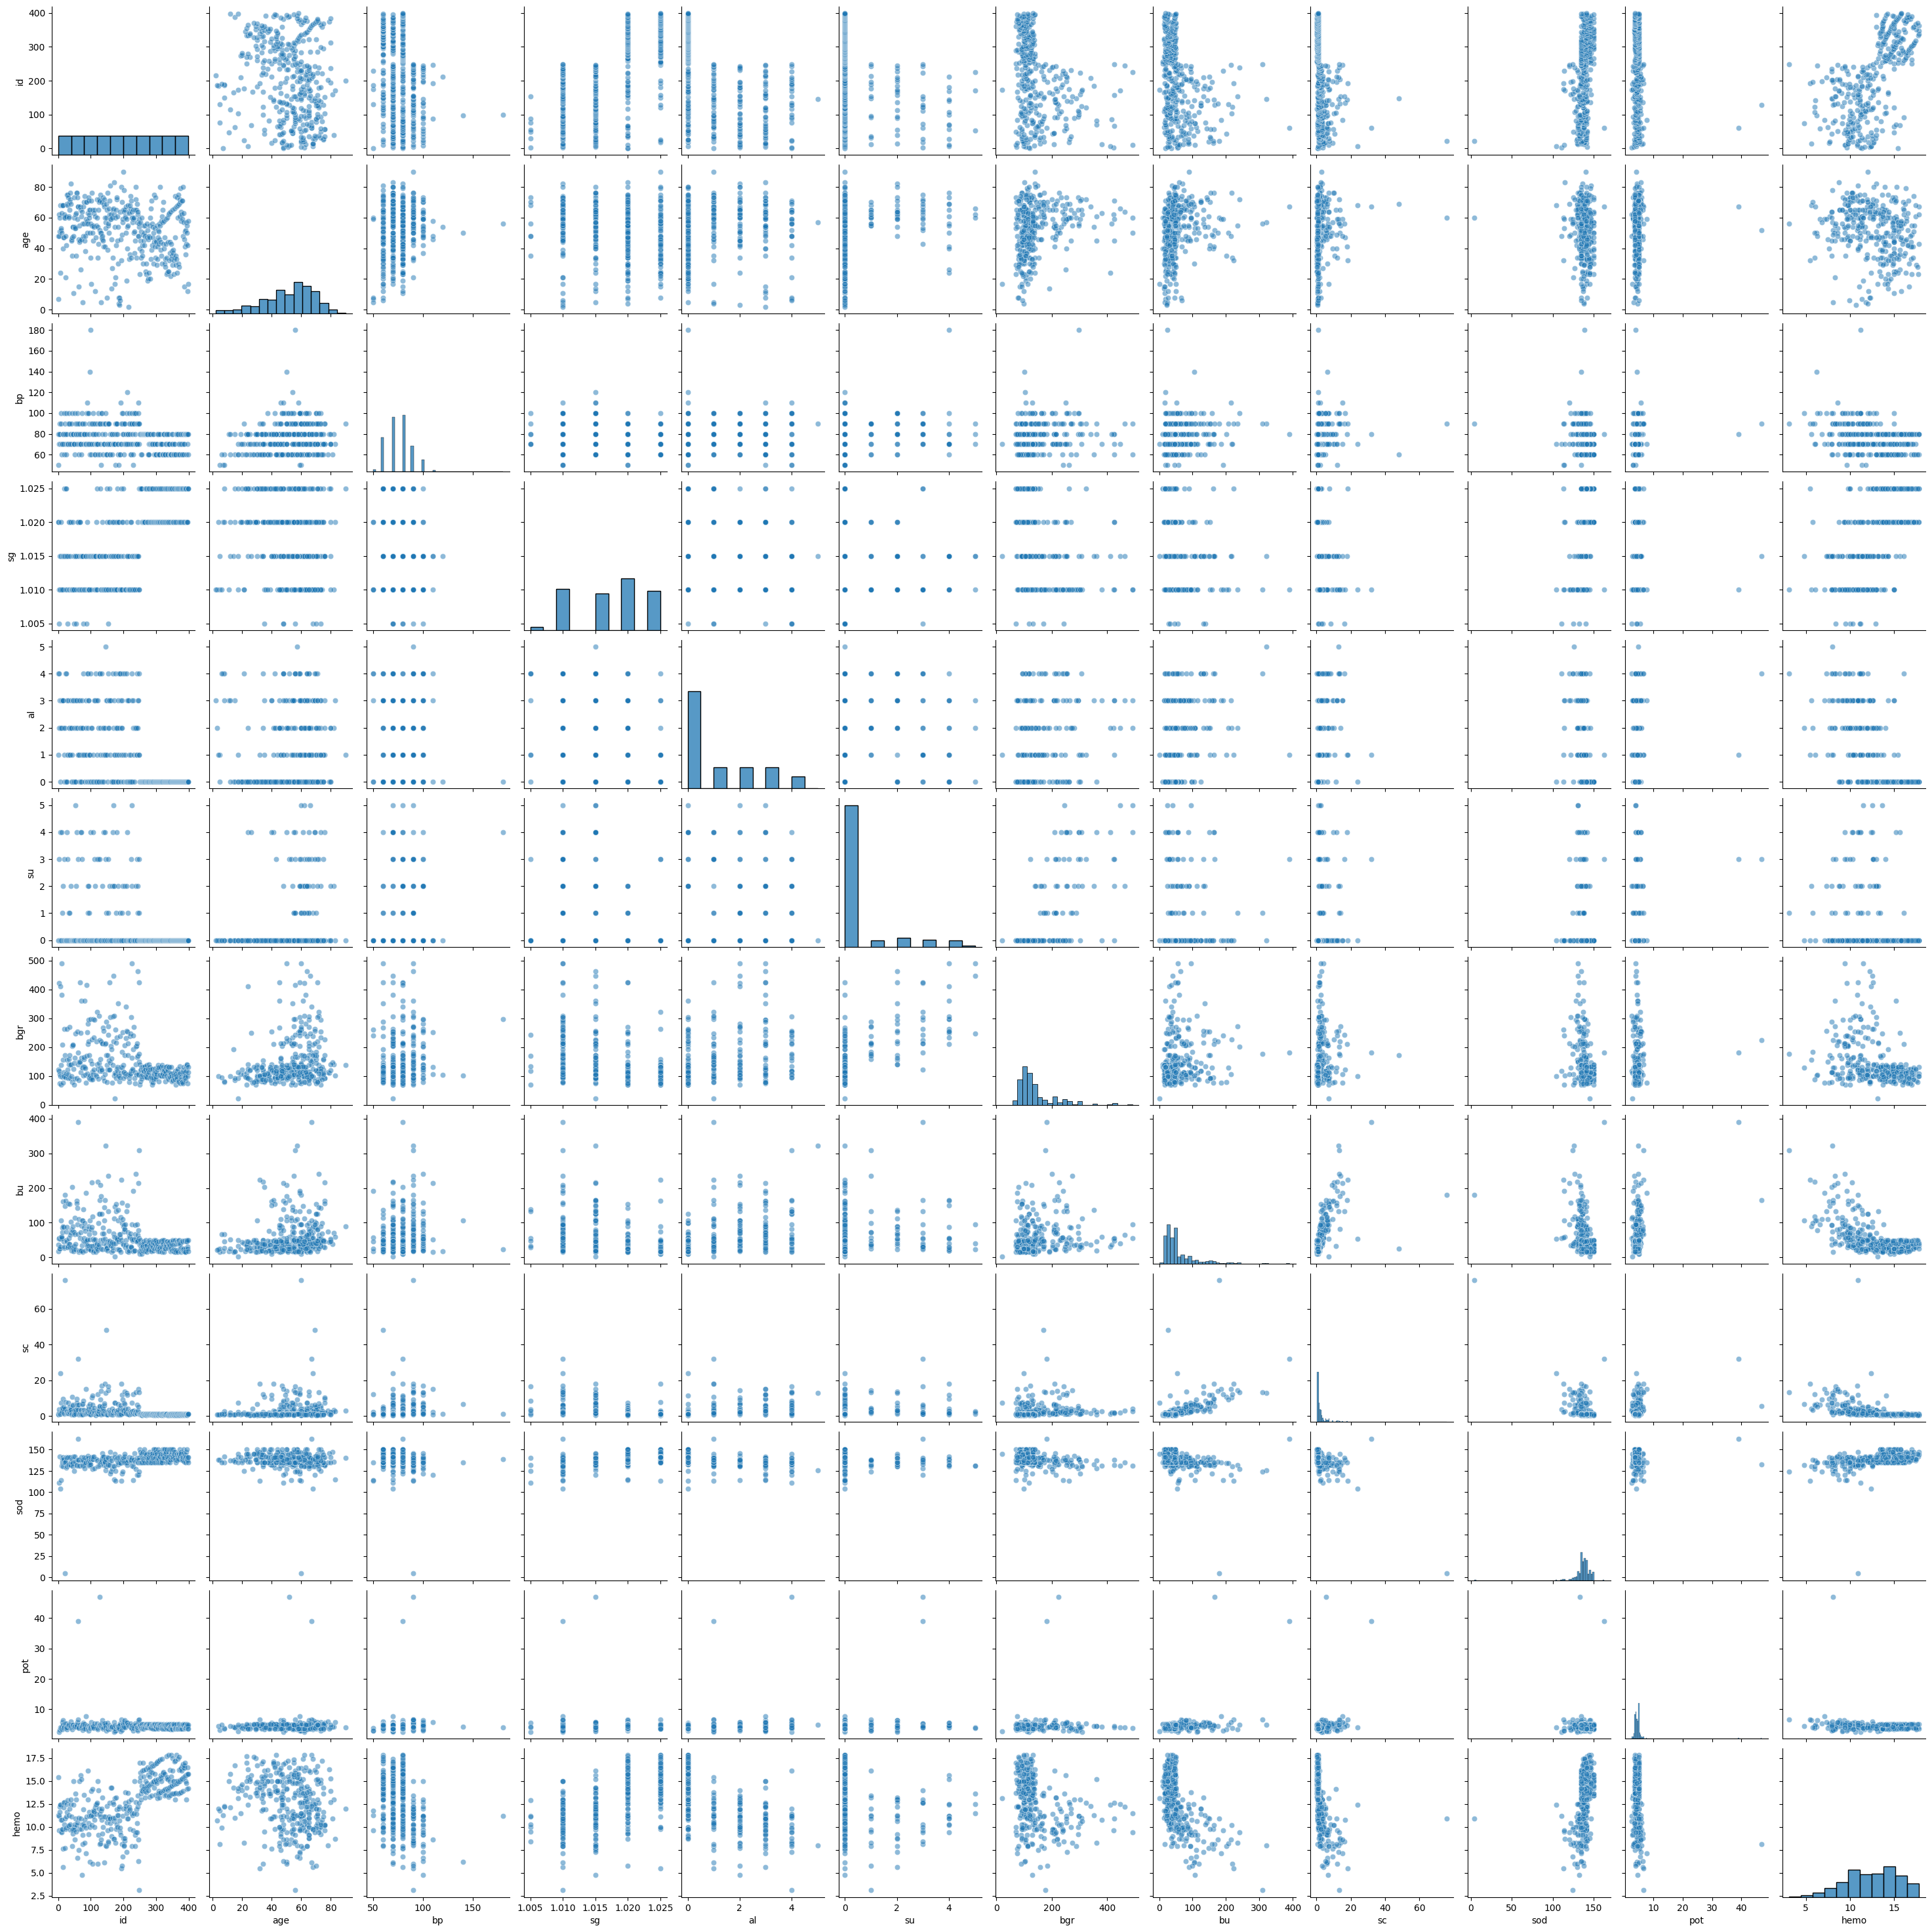

In [25]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.5})

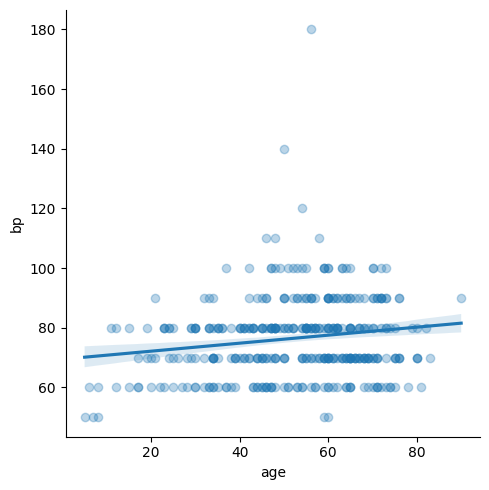

In [28]:
sns.lmplot(x='age',
           y='bp',
           data=df,
           scatter_kws={'alpha': 0.3})

In [29]:
from sklearn.model_selection import train_test_split

In [34]:
x=df[['age', 'bp', 'sg', 'al','su', 'sod', 'pot','bgr', 'bu', 'sc', 'hemo']]
y=df['classification']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [36]:
x_train

,age,bp,sg,al,su,sod,pot,bgr,bu,sc,hemo
108,45.0,80.0,1.015,0.0,0.0,141.0,4.2,107.0,15.0,1.0,11.8
101,71.0,90.0,1.015,2.0,0.0,139.0,5.7,88.0,80.0,4.4,11.3
295,44.0,70.0,NaN,NaN,NaN,150.0,3.6,106.0,25.0,0.9,15.0
192,46.0,110.0,1.015,0.0,0.0,NaN,NaN,130.0,16.0,0.9,NaN
13,68.0,70.0,NaN,NaN,NaN,135.0,3.4,98.0,86.0,4.6,9.8
...,...,...,...,...,...,...,...,...,...,...,...
213,55.0,80.0,1.010,3.0,1.0,137.0,4.9,214.0,73.0,3.9,10.9
95,62.0,90.0,1.015,1.0,0.0,131.0,3.7,94.0,25.0,1.1,NaN
32,61.0,90.0,1.010,1.0,1.0,133.0,4.9,159.0,39.0,1.5,11.3
380,59.0,60.0,1.020,0.0,0.0,139.0,3.5,113.0,23.0,1.1,15.3


In [37]:
x_test

,age,bp,sg,al,su,sod,pot,bgr,bu,sc,hemo
255,34.0,80.0,1.025,0.0,0.0,144.0,3.9,121.0,27.0,1.2,13.6
346,33.0,60.0,NaN,NaN,NaN,141.0,4.4,130.0,41.0,0.9,15.5
228,60.0,70.0,NaN,NaN,NaN,NaN,NaN,124.0,52.0,2.5,NaN
384,57.0,60.0,1.020,0.0,0.0,150.0,4.7,132.0,18.0,1.1,15.4
269,25.0,80.0,1.025,0.0,0.0,142.0,4.9,121.0,19.0,1.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...
399,58.0,80.0,1.025,0.0,0.0,141.0,3.5,131.0,18.0,1.1,15.8
216,64.0,70.0,1.010,0.0,0.0,NaN,NaN,107.0,15.0,NaN,12.8
397,12.0,80.0,1.020,0.0,0.0,137.0,4.4,100.0,26.0,0.6,15.8
271,30.0,80.0,1.025,0.0,0.0,144.0,4.8,96.0,25.0,0.5,13.8


In [38]:
y_train

,classification
108,ckd
101,ckd
295,notckd
192,ckd
13,ckd
...,...
213,ckd
95,ckd
32,ckd
380,notckd


In [39]:
y_test

,classification
255,notckd
346,notckd
228,ckd
384,notckd
269,notckd
...,...
399,notckd
216,ckd
397,notckd
271,notckd


In [40]:
#training the model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm=LinearRegression()

# Task
The previous attempt to train a Linear Regression model failed because of missing values in the data. To address this, the plan is to:

1.  **Impute Missing Values**: Fill in the missing numerical values (NaNs) in both the training (x_train) and testing (x_test) feature sets using a `SimpleImputer` with the mean strategy.
2.  **Initialize and Train Logistic Regression Model**: Initialize a `LogisticRegression` model and train it using the imputed `x_train` and `y_train` data.
3.  **Make Predictions**: Use the trained `LogisticRegression` model to make predictions on the preprocessed `x_test` data.
4.  **Evaluate Model Performance**: Evaluate the performance of the `LogisticRegression` model using relevant classification metrics such as accuracy, and display a classification report.
5.  **Finish task**: Indicate that the model has been trained and evaluated, resolving the initial error.

## Impute Missing Values

### Subtask:
Use a `SimpleImputer` to fill in the missing numerical values (NaNs) in both the training (x_train) and testing (x_test) feature sets. We will use the mean imputation strategy.


**Reasoning**:
To begin the imputation process, I need to import the `SimpleImputer` class from `sklearn.impute`.



In [48]:
from sklearn.impute import SimpleImputer
print("SimpleImputer imported successfully.")

SimpleImputer imported successfully.


**Reasoning**:
Now that `SimpleImputer` is imported, I will instantiate it with the 'mean' strategy, fit it to `x_train` to learn the mean for each column, and then transform both `x_train` and `x_test` to fill in the missing values. Finally, I will convert the imputed arrays back into pandas DataFrames, preserving the column names.



In [49]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

x_train = pd.DataFrame(x_train_imputed, columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(x_test_imputed, columns=x_test.columns, index=x_test.index)

print("Missing values in x_train after imputation:")
print(x_train.isnull().sum().sum())
print("Missing values in x_test after imputation:")
print(x_test.isnull().sum().sum())

Missing values in x_train after imputation:
0
Missing values in x_test after imputation:
0


## Initialize and Train Logistic Regression Model

### Subtask:
Initialize a `LogisticRegression` model and train it using the imputed `x_train` and `y_train` data.

#### Instructions
1. Import the `LogisticRegression` class from `sklearn.linear_model`.
2. Instantiate a `LogisticRegression` object. You may set `solver='liblinear'` for small datasets and `random_state` for reproducibility.
3. Train the model using the `.fit()` method on `x_train` and `y_train`.

**Reasoning**:
Now that the missing values are handled, I will import the `LogisticRegression` class and then instantiate and train the model using the imputed `x_train` and `y_train` data.



In [50]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lm = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
lm.fit(x_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Make Predictions

### Subtask:
Use the trained `LogisticRegression` model to make predictions on the preprocessed `x_test` data.

#### Instructions
1. Use the `.predict()` method of the trained `lm` model on `x_test` to generate predictions.
2. Store these predictions in a variable, for example, `y_pred`.

**Reasoning**:
Following the plan, I will now use the trained `LogisticRegression` model (`lm`) to make predictions on the imputed test features (`x_test`) and store them in `y_pred`.



In [51]:
y_pred = lm.predict(x_test)
print("Predictions made successfully.")

Predictions made successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the performance of the `LogisticRegression` model using relevant classification metrics such as accuracy, and display a classification report.

#### Instructions
1. Import `accuracy_score` and `classification_report` from `sklearn.metrics`.
2. Calculate the accuracy of the model by comparing `y_test` and `y_pred`.
3. Print the accuracy score.
4. Generate and print the classification report.

**Reasoning**:
Now that predictions have been made, I will import the necessary metrics from `sklearn.metrics` to evaluate the model's performance by calculating and printing the accuracy score and a comprehensive classification report.



In [52]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

         ckd       0.94      0.97      0.96        68
      notckd       0.96      0.92      0.94        52

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



## Summary:

### Data Analysis Key Findings

*   Missing values in both the training (`x_train`) and testing (`x_test`) datasets were successfully imputed using a `SimpleImputer` with a mean strategy, resulting in zero missing values in both sets.
*   A `LogisticRegression` model was successfully initialized and trained on the imputed `x_train` and `y_train` data.
*   The trained `LogisticRegression` model achieved an accuracy of 0.95 on the test set.
*   The classification report indicated good performance across both classes, 'ckd' and 'notckd', based on precision, recall, and f1-score metrics.

### Insights or Next Steps

*   The chosen mean imputation strategy proved effective in handling missing data, allowing for successful model training.
*   Given the high accuracy of 95%, the Logistic Regression model is a strong candidate for predicting the target variable based on the provided features.


In [53]:
lm.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [55]:
lm.coef_

array([[-0.01287113,  0.11603385,  0.19113192,  1.45781843,  0.4675312 ,
         0.03875321, -0.24047594,  0.03471333, -0.00798685,  0.68944841,
        -1.38528686],
       [ 0.09413436, -0.05423353, -0.02256936,  0.15402952, -0.34793687,
        -0.00953408,  0.16909088,  0.0034968 , -0.05770221,  0.08296354,
        -0.36356914],
       [-0.00494282, -0.13584785, -0.17865145, -2.1514251 , -0.35995605,
        -0.04998655,  0.12261602, -0.06010965,  0.01406326, -1.09961433,
         1.97130445]])

In [58]:
cdf=pd.DataFrame(lm.coef_[0].reshape(1, -1), columns=x_train.columns, index=['coefficients'])
cdf

,age,bp,sg,al,su,sod,pot,bgr,bu,sc,hemo
coefficients,-0.012871,0.116034,0.191132,1.457818,0.467531,0.038753,-0.240476,0.034713,-0.007987,0.689448,-1.385287


In [59]:
#predictions

predictions=lm.predict(x_test)

In [60]:
predictions

array(['notckd', 'notckd', 'ckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'notckd', 'notckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'no

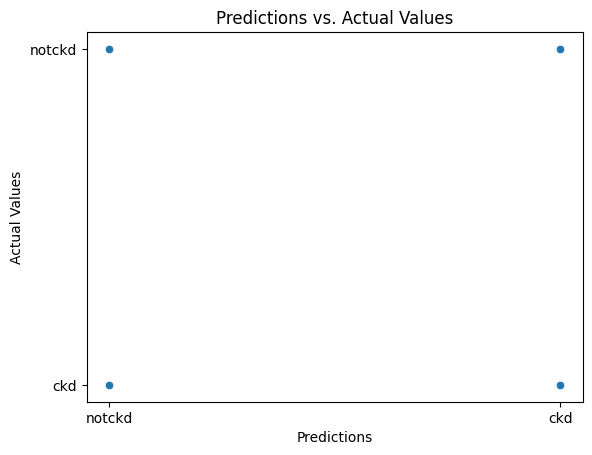

In [64]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Predictions vs. Actual Values')
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math